<a href="https://colab.research.google.com/github/Raghu010/CNN-algorithm-on-cifar-dataset/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, print_function, division, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds

In [0]:
dataset, metadata = tfds.load('cifar10', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [65]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(num_train_examples)
print(num_test_examples)

50000
10000


In [66]:
print(metadata)

tfds.core.DatasetInfo(
    name='cifar10',
    version=1.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



In [0]:
def normalize(images, label):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

  train_dataset = train_dataset.cache()
  test_dataset = test_dataset.cache()

In [0]:
for images, label in train_dataset.take(1):
  break
  image = images.numpy().reshape((32, 32, 3))
  plt.figure()
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

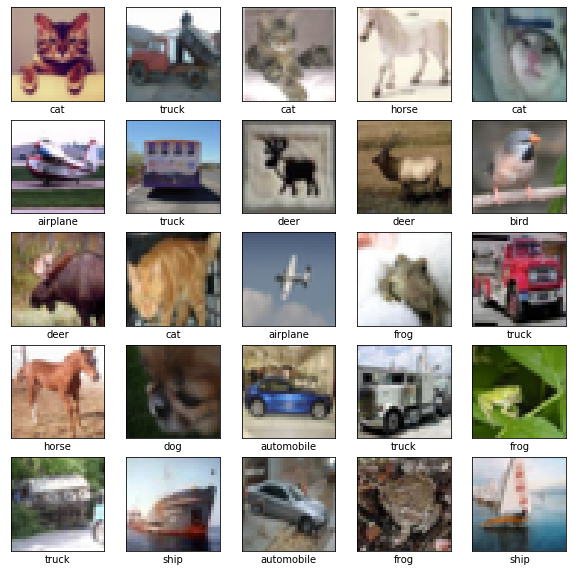

In [81]:
plt.figure(figsize= (10, 10))
i = 0
for images, label in train_dataset.take(25):
  image = images.numpy().reshape((32, 32, 3))
  plt.subplot(5, 5, i+1)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation = tf.nn.relu, padding = 'same', input_shape = (32, 32, 3)),
                             tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                             
                             tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu, padding = 'same'),
                             tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                             
                             tf.keras.layers.Conv2D(128, (3, 3), activation = tf.nn.relu, padding = 'same'),
                             tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

                             
                             
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation= tf.nn.relu),
                             tf.keras.layers.Dense(10, activation= tf.nn.softmax)
                             ])

In [0]:
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


In [96]:
import math
model.fit(train_dataset, epochs = 6, steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))

Train for 1563 steps
Epoch 1/6
1563/1563 [==============================] - 145s 93ms/step - loss: 1.1404 - accuracy: 0.5977
Epoch 2/6
1563/1563 [==============================] - 139s 89ms/step - loss: 1.0642 - accuracy: 0.6276
Epoch 3/6
1563/1563 [==============================] - 143s 92ms/step - loss: 1.0236 - accuracy: 0.6430
Epoch 4/6
1563/1563 [==============================] - 145s 93ms/step - loss: 0.9755 - accuracy: 0.6623
Epoch 5/6
1563/1563 [==============================] - 144s 92ms/step - loss: 0.9609 - accuracy: 0.6679
Epoch 6/6
1563/1563 [==============================] - 143s 91ms/step - loss: 0.9209 - accuracy: 0.6820


In [97]:
test_loss, test_acc = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print(test_acc)

313/313 [==============================] - 9s 30ms/step - loss: 0.9702 - accuracy: 0.6656
0.6656


In [0]:
for test_image, test_labels in test_dataset.take(1):
  test_image = test_image.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_image)

In [104]:
test_image.shape

(32, 32, 32, 3)

In [105]:
test_labels.shape

(32,)

In [106]:
predictions

array([[2.63646077e-02, 4.86824196e-04, 8.50327790e-01, 6.12319931e-02,
        1.06159579e-02, 2.89120525e-02, 1.53560489e-02, 4.31026472e-03,
        1.78602093e-03, 6.08357659e-04],
       [2.77278032e-02, 7.47796237e-01, 8.32520612e-03, 1.81151349e-02,
        7.19039189e-03, 6.25991961e-03, 3.86343487e-02, 3.95222334e-03,
        6.20058216e-02, 7.99929127e-02],
       [1.05867686e-03, 1.16259267e-03, 1.53844701e-02, 4.37306702e-01,
        2.06797551e-02, 6.50655776e-02, 4.56112921e-01, 2.44251429e-03,
        4.97589528e-04, 2.89191899e-04],
       [6.40578195e-02, 2.07925271e-02, 2.85870750e-02, 3.16353589e-02,
        1.51602793e-02, 4.83906735e-03, 4.08332162e-02, 2.74695782e-03,
        7.79577613e-01, 1.17700966e-02],
       [3.48005816e-02, 1.29721723e-02, 3.58544923e-02, 1.13098308e-01,
        1.89443380e-02, 8.77953917e-02, 1.53234810e-01, 2.45045930e-01,
        1.38008839e-03, 2.96873927e-01],
       [1.08934477e-01, 1.70032121e-03, 7.15630576e-02, 4.27631944e-01,
   

In [107]:
predictions[0]

array([2.6364608e-02, 4.8682420e-04, 8.5032779e-01, 6.1231993e-02,
       1.0615958e-02, 2.8912053e-02, 1.5356049e-02, 4.3102647e-03,
       1.7860209e-03, 6.0835766e-04], dtype=float32)

In [108]:
np.argmax(predictions[0])

2

In [109]:
test_labels[0]

2

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

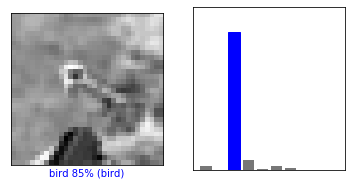

In [111]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

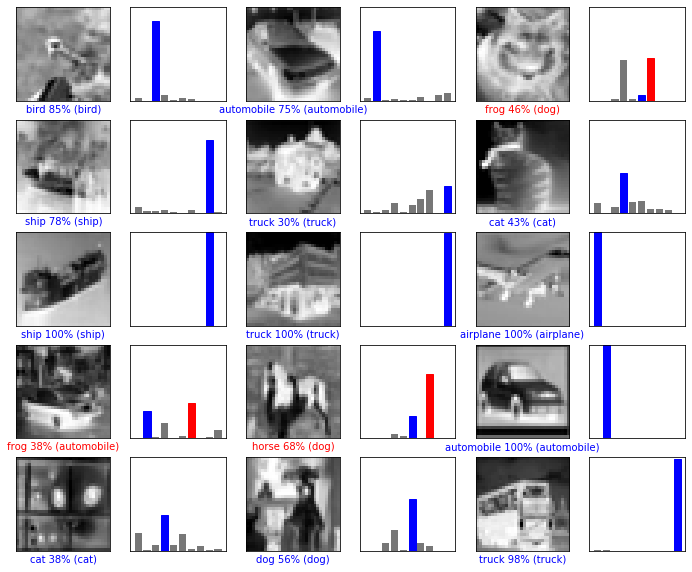

In [112]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)